In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer/breast-cancer.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("/kaggle/input/breast-cancer/breast-cancer.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
print(df.duplicated().sum())

0


In [6]:
# Define SVM model
svm = SVC()

In [7]:
x=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=15)

In [8]:
# Define modified parameter grid for hyperparameter tuning
param_grid_modified = {'C': [0.001, 0.01, 0.1, 1, 10],  # Include smaller values of C
                      'gamma': [10, 100, 1000],           # Include larger values of gamma
                      'kernel': ['rbf', 'sigmoid']}       # Include 'sigmoid' kernel

# Perform grid search with cross-validation using the modified parameter grid
grid_search_modified = GridSearchCV(svm, param_grid_modified, cv=5)
grid_search_modified.fit(x_train, y_train)

# Get best hyperparameters
best_params_modified = grid_search_modified.best_params_

In [9]:
# Train SVM model with best hyperparameters
best_svm = SVC(**best_params_modified)
best_svm.fit(x_train, y_train)

SVC(C=0.001, gamma=10)

In [10]:
# Predictions
y_pred_train = best_svm.predict(x_train)
y_pred_test = best_svm.predict(x_test)

In [11]:
# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on training set:", accuracy_train)
print("Accuracy on test set:", accuracy_test)

Accuracy on training set: 0.6197802197802198
Accuracy on test set: 0.6578947368421053


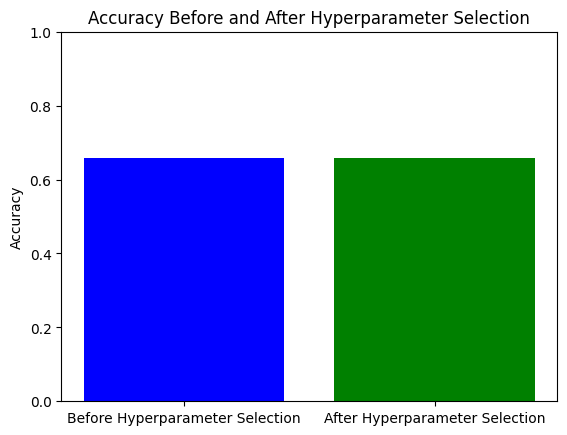

In [12]:
# Plotting accuracy before and after hyperparameter selection
labels = ['Before Hyperparameter Selection', 'After Hyperparameter Selection']
accuracy_scores = [svm.fit(x_train, y_train).score(x_test, y_test), best_svm.score(x_test, y_test)]

plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy Before and After Hyperparameter Selection')
plt.ylim(0, 1.0)
plt.show()